<a href="https://colab.research.google.com/github/may-cbcp/ghg_act-a/blob/main/notebook/ghg_acta_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

arquivo = "/content/drive/MyDrive/drive-rafael/ACT-A/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"
nome_aba = "Overall"
act_a = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

Mounted at /content/drive


In [142]:
# act_a

In [143]:
arquivo = "/content/drive/MyDrive/drive-rafael/ACT-A/tabelas/origem-privados.xlsx"
nome_aba = "aba_01"
privados = pd.read_excel(arquivo, skiprows=0, sheet_name=nome_aba)
# privados

In [144]:
doadores_privados_origem = pd.merge(act_a, privados, on="Donor")
doadores_privados_origem = doadores_privados_origem.sort_values(by="TOTAL ACT-A funding", ascending=False)


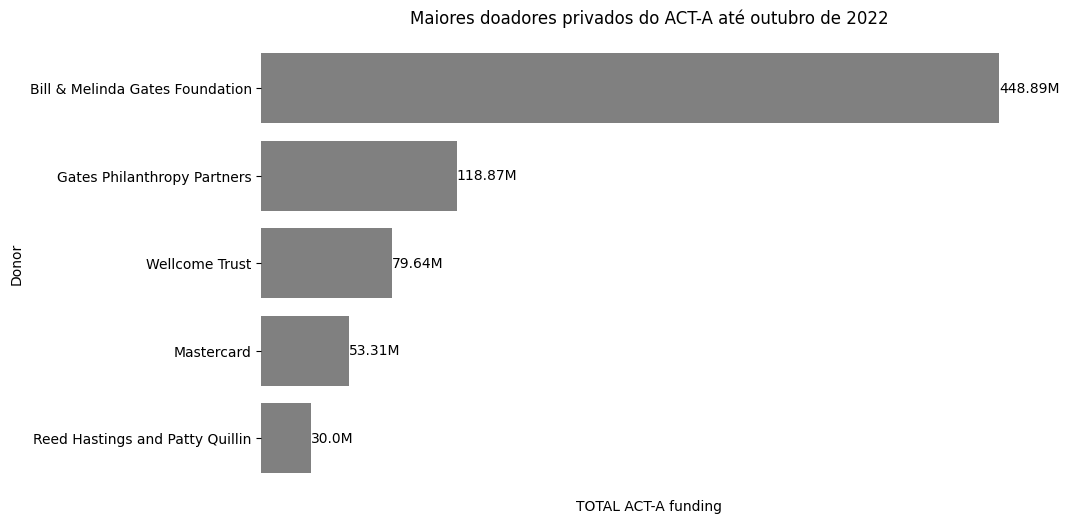

In [183]:

df = doadores_privados_origem

#Selecionar os top 5 doadores
top5 = doadores_privados_origem.head(5)

# Criar o gráfico de barras horizontais invertidas com Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.barh(top5['Donor'], top5['TOTAL ACT-A funding'], color='gray', edgecolor='none')  # Remover bordas


# # Ajustar o tamanho da figura para manter a separação entre as barras
# plt.figure(figsize=(10, len(top5) * 0.4))  # Ajustar a altura conforme o número de barras

# # Criar o gráfico de barras com Matplotlib para os doadores restantes
# bars = plt.barh(top5['Donor'], top5['TOTAL ACT-A funding'], color='gray', edgecolor='none', height=0.9)  # Ajustar a altura

# Adicionar rótulos e título
plt.xlabel('TOTAL ACT-A funding')
plt.ylabel('Donor')
plt.title('Maiores doadores privados do ACT-A até outubro de 2022')

# Remover escalas no eixo x
plt.xticks([])

# Adicionar valores nos extremos das barras com notação em milhões
def formatar_milhoes(x, _):
    return f'{round(x, 2)}M'

for bar in bars:
    valor = bar.get_width()
    plt.text(valor, bar.get_y() + bar.get_height()/2, formatar_milhoes(valor, None), va='center', ha='left')

# Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Inverter a ordem dos doadores para corresponder ao gráfico do Plotly
plt.gca().invert_yaxis()

# Adicionar formatação personalizada para os rótulos do eixo x
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhoes))

# Exibir o gráfico
plt.show()

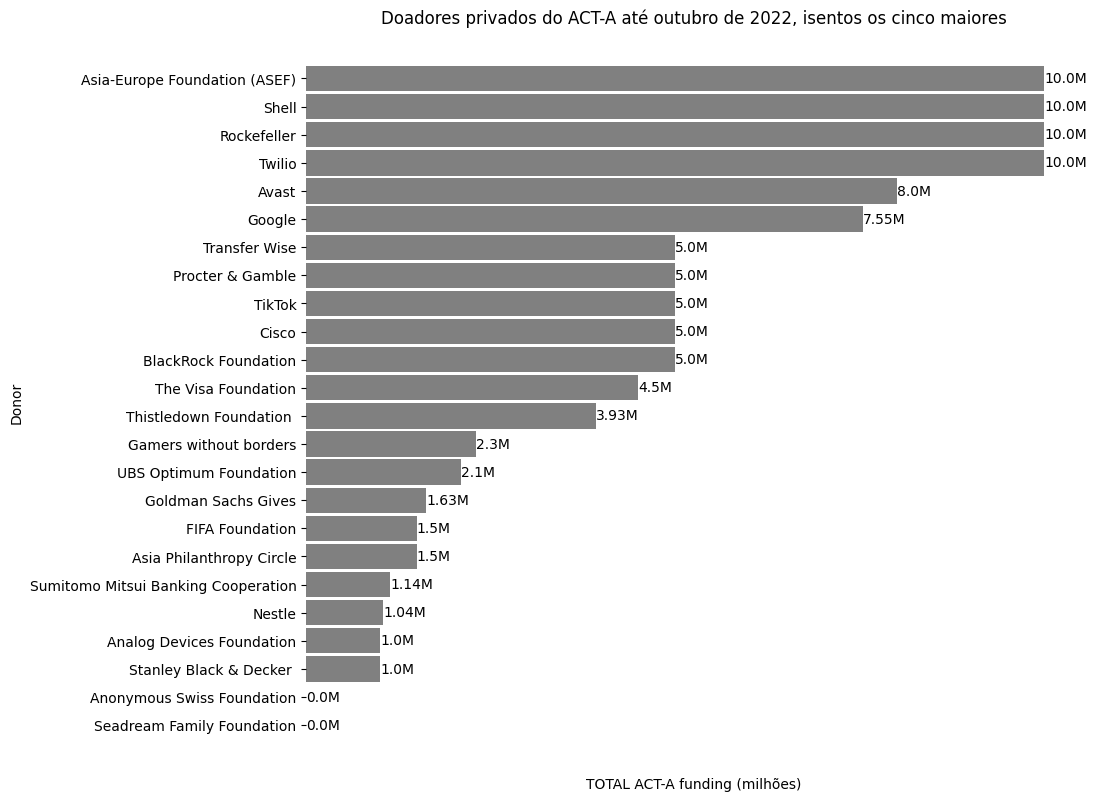

In [146]:
restante = df.tail(len(df) - 5)

# Ajustar o tamanho da figura para manter a separação entre as barras
plt.figure(figsize=(10, len(restante) * 0.4))  # Ajustar a altura conforme o número de barras

# Criar o gráfico de barras com Matplotlib para os doadores restantes
bars = plt.barh(restante['Donor'], restante['TOTAL ACT-A funding'], color='gray', edgecolor='none', height=0.9)  # Ajustar a altura

# Adicionar rótulos e título
plt.xlabel('TOTAL ACT-A funding (milhões)')
plt.ylabel('Donor')
plt.title('Doadores privados do ACT-A até outubro de 2022, isentos os cinco maiores')

# Remover escalas no eixo x
plt.xticks([])

# Adicionar valores nos extremos das barras com notação em milhões
def formatar_milhoes(x, _):
    return f'{round(x, 2)}M'

for bar in bars:
    valor = bar.get_width()
    plt.text(valor, bar.get_y() + bar.get_height()/2, formatar_milhoes(valor, None), va='center', ha='left')

# Remover bordas da caixa ao redor do gráfico
plt.box(False)

# Inverter a ordem dos doadores para corresponder ao gráfico do Plotly
plt.gca().invert_yaxis()

# Adicionar formatação personalizada para os rótulos do eixo x
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhoes))

# Exibir o gráfico
plt.show()

In [147]:
# restante = df.tail(len(df) - 5)
# grafico_restante = px.bar(restante,x='Donor', y='TOTAL ACT-A funding', title='Doadores privados do ACT-A até outubro de 2022, isentos os cinco maiores',height=650)
# grafico_restante.update_traces(marker_color='gray',texttemplate='%{y:.2f}', textposition='outside')
# grafico_restante.update_layout(plot_bgcolor='whitesmoke')

In [148]:
!pip install geopy
from geopy.geocoders import Nominatim

def obter_coordenadas_por_pais(nome_do_pais):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(nome_do_pais)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None,None

In [149]:
df = doadores_privados_origem
df['Latitude'], df['Longitude'] = zip(*df['Origin'].apply(obter_coordenadas_por_pais).tolist())

lalo = df

In [150]:
lalo

,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments,Origin,Latitude,Longitude
1,Bill & Melinda Gates Foundation,Private,448.886229,448.636229,0.250000,0.00000,19.999978,236.250000,190.0000,0.0,...,0.0,257.030083,190.285111,0.307027,1.014009,0.25,Gavi figures include the pro-rata share of una...,United States of America,39.783730,-100.445882
2,Gates Philanthropy Partners,Private,118.869500,118.869500,0.000000,0.00000,0.000000,18.000000,100.8695,0.0,...,0.0,18.000000,100.869500,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
4,Wellcome Trust,Private,79.643427,75.000000,3.811007,0.83242,25.000000,0.000000,50.0000,0.0,...,0.0,25.000000,50.000000,3.811007,0.832420,0.00,NaN,United Kingdom,54.702354,-3.276575
3,Mastercard,Private,53.305266,53.305266,0.000000,0.00000,0.000000,28.305266,25.0000,0.0,...,0.0,28.305266,25.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
6,Reed Hastings and Patty Quillin,Private,30.000000,30.000000,0.000000,0.00000,0.000000,30.000000,0.0000,0.0,...,0.0,30.000000,0.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
0,Asia-Europe Foundation (ASEF),Private,10.000000,0.000000,0.000000,10.00000,0.000000,0.000000,0.0000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NGR = Non gap reducing,Singapore,1.357107,103.819499
8,Shell,Private,10.000000,10.000000,0.000000,0.00000,0.000000,10.000000,0.0000,0.0,...,0.0,10.000000,0.000000,0.000000,0.000000,0.00,NaN,United Kingdom,54.702354,-3.276575
9,Rockefeller,Private,10.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0,...,0.0,0.000000,0.000000,10.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
10,Twilio,Private,10.000000,10.000000,0.000000,0.00000,0.000000,10.000000,0.0000,0.0,...,0.0,10.000000,0.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
11,Avast,Private,7.999959,7.999959,0.000000,0.00000,7.999959,0.000000,0.0000,0.0,...,0.0,7.999959,0.000000,0.000000,0.000000,0.00,NaN,Czech Republic,49.743905,15.338106


In [151]:
df = lalo

soma_por_pais = df.groupby('Origin').agg({'TOTAL ACT-A funding': 'sum', 'Donor': 'count'}).reset_index()
soma_por_pais = soma_por_pais.rename(columns={'TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Donor': 'Total de Doadores'})
soma_por_pais = soma_por_pais.sort_values(by='Soma TOTAL ACT-A funding', ascending=False)
soma_por_pais

,Origin,Soma TOTAL ACT-A funding,Total de Doadores
7,United States of America,701.739046,15
6,United Kingdom,94.643751,3
4,Singapore,16.500000,3
1,Czech Republic,7.999959,1
5,Switzerland,4.641992,4
0,Canada,3.932054,1
3,Saudi Arabia,2.304500,1
2,Japan,1.141683,1


In [152]:
import locale
df = lalo
locale.setlocale(locale.LC_NUMERIC, '')
soma_por_pais = df.groupby('Origin').agg({'TOTAL ACT-A funding': 'sum', 'Donor': 'count'}).reset_index()
soma_por_pais = soma_por_pais.rename(columns={'TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Donor': 'Total de Doadores'})
soma_por_pais = soma_por_pais.sort_values(by='Soma TOTAL ACT-A funding', ascending=False)
soma_por_pais['Soma TOTAL ACT-A funding'] = soma_por_pais['Soma TOTAL ACT-A funding']
soma_por_pais

,Origin,Soma TOTAL ACT-A funding,Total de Doadores
7,United States of America,701.739046,15
6,United Kingdom,94.643751,3
4,Singapore,16.500000,3
1,Czech Republic,7.999959,1
5,Switzerland,4.641992,4
0,Canada,3.932054,1
3,Saudi Arabia,2.304500,1
2,Japan,1.141683,1


In [153]:
# Criar o gráfico de barras agrupadas com escala logarítmica no eixo y
fig = px.bar(soma_por_pais, x='Origin', y='Soma TOTAL ACT-A funding', color='Total de Doadores',
             title='Relação entre Origin, Soma TOTAL ACT-A funding e Total de Doadores',
             labels={'Soma TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Total de Doadores': 'Total de Doadores'},
             log_y=True)  # Usar escala logarítmica para o eixo y

# Exibir o gráfico
fig.show()

In [154]:
fig = px.scatter_geo(soma_por_pais, locations='Origin', locationmode='country names',
                     size='Soma TOTAL ACT-A funding', color='Total de Doadores',
                     projection='natural earth', title='Scatter_geo - Soma de TOTAL ACT-A funding e Total de Doadores por País')

# Exibir o gráfico
fig.show()

In [155]:
arquivo = "/content/drive/MyDrive/drive-rafael/ACT-A/tabelas/arquivos2.xlsx"
nome_aba = "arquivos"
categorias = pd.read_excel(arquivo, sheet_name=nome_aba)
categorias


,data,categoria,titulo,nome_arquivo
0,2020-04-24 00:00:00,Founding,Access to COVID-19 Tools (ACT) Accelerator A G...,2020_04_24_Founding_Access to COVID-19 Tools (...
1,2020-06-26 00:00:00,Budget,ACT Accelerator Investment Case Invest now to ...,2020_06_26_Budget_ACT Accelerator Investment C...
2,2020-08-06 00:00:00,Showcase,"COVAX, the ACT-Accelerator vaccines pillar Ins...","2020_08_06_Showcase_COVAX, the ACT-Accelerator..."
3,2020-09-24 00:00:00,Budget,financing requirements September 2020 – Decemb...,2020_09_24_Budget_ACT-Accelerator_ An economic...
4,2020-09-24 00:00:00,Strategic Plan,Status report and plan September 2020 – Decemb...,2020_09_24_Strategic Plan_ACT-Accelerator_ Sta...
...,...,...,...,...
97,00/00/2021,Evaluation,combined report,2021_Evaluation_CEPI mid-term review and COVID...
98,00/00/2022,Evaluation,TOR Independent Evaluation Reference Group ACT...,2022_Evaluation_TOR Independent Evaluation Ref...
99,00/01/2022,Budget,The Gavi COVAX AMC Investment Opportunity,2022_01_Budget_Break COVID Now_ The Gavi COVAX...
100,00/04/2022,Evaluation,s COVID-19 Vaccine Development Agreements,2022_04_Evaluation_Equitable Access Review of ...


In [156]:

df = categorias
# Força o tratamento da coluna 'data' como string
df['data'] = df['data'].astype(str)

# Substitui datas inválidas (mês '00') por NaT
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Aplica a formatação apenas se a data não for NaT
df['data_formatada'] = df['data'].apply(lambda x: x.strftime('%m/%Y') if not pd.isnull(x) else '')
df


,data,categoria,titulo,nome_arquivo,data_formatada
0,2020-04-24,Founding,Access to COVID-19 Tools (ACT) Accelerator A G...,2020_04_24_Founding_Access to COVID-19 Tools (...,04/2020
1,2020-06-26,Budget,ACT Accelerator Investment Case Invest now to ...,2020_06_26_Budget_ACT Accelerator Investment C...,06/2020
2,2020-08-06,Showcase,"COVAX, the ACT-Accelerator vaccines pillar Ins...","2020_08_06_Showcase_COVAX, the ACT-Accelerator...",08/2020
3,2020-09-24,Budget,financing requirements September 2020 – Decemb...,2020_09_24_Budget_ACT-Accelerator_ An economic...,09/2020
4,2020-09-24,Strategic Plan,Status report and plan September 2020 – Decemb...,2020_09_24_Strategic Plan_ACT-Accelerator_ Sta...,09/2020
...,...,...,...,...,...
97,NaT,Evaluation,combined report,2021_Evaluation_CEPI mid-term review and COVID...,
98,NaT,Evaluation,TOR Independent Evaluation Reference Group ACT...,2022_Evaluation_TOR Independent Evaluation Ref...,
99,NaT,Budget,The Gavi COVAX AMC Investment Opportunity,2022_01_Budget_Break COVID Now_ The Gavi COVAX...,
100,NaT,Evaluation,s COVID-19 Vaccine Development Agreements,2022_04_Evaluation_Equitable Access Review of ...,


In [157]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Filtrando as datas no intervalo desejado (04/2020 a 09/2021)
filtro_datas = (df['data_formatada'] >= '2020-04-01') & (df['data_formatada'] <= '2021-10-27')
df_filtrado = df[filtro_datas]

# Contando a quantidade de cada categoria no intervalo de datas
contagem_categorias = df_filtrado['categoria'].value_counts()
contagem_categorias

Bureaucratic      19
Report            14
Showcase          10
Budget             9
Strategic Plan     2
Founding           1
Evaluation         1
Name: categoria, dtype: int64

In [158]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Filtrando as datas no "momento 1" (04/2020 a 09/2021)
filtro_datas_momento1 = (df['data_formatada'] >= '2020-04-01') & (df['data_formatada'] <= '2021-10-27')
df_momento1 = df[filtro_datas_momento1]

# Contando a quantidade de cada categoria no "momento 1"
contagem_categorias_momento1 = df_momento1['categoria'].value_counts()

# Criando um novo DataFrame com as contagens
df_resultado = pd.DataFrame({'categorias': contagem_categorias_momento1.index, 'momento 1': contagem_categorias_momento1.values})
df_resultado

<ipython-input-158-3d0a52fa7b50>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,categorias,momento 1
0,Bureaucratic,19
1,Report,14
2,Showcase,10
3,Budget,9
4,Strategic Plan,2
5,Founding,1
6,Evaluation,1


In [159]:
# Convertendo a coluna 'data_formatada' para o tipo datetime com tratamento de erros
df['data_formatada'] = pd.to_datetime(df['data_formatada'], format='%m/%Y', errors='coerce')

# Removendo as linhas com valores de data inválidos
df = df.dropna(subset=['data_formatada'])

# Definindo os momentos
momentos = {'momento 1': ('2020-04-01', '2021-10-27'),
            'momento 2': ('2021-10-28', '2022-10-27'),
            'momento 3': ('2022-10-28', '2023-10-31')}

# Criando um DataFrame para armazenar as contagens
df_resultado = pd.DataFrame()

# Iterando sobre os momentos
for momento, (inicio, fim) in momentos.items():
    filtro_datas_momento = (df['data_formatada'] >= inicio) & (df['data_formatada'] <= fim)
    df_momento = df[filtro_datas_momento]

    contagem_categorias_momento = df_momento['categoria'].value_counts().reset_index()

    # Preenchendo o DataFrame de resultados
    df_resultado = pd.concat([df_resultado, contagem_categorias_momento.set_index('index').rename(columns={'categoria': momento})], axis=1)

# Resetando o índice e movendo 'categorias' para uma coluna
df_resultado = df_resultado.reset_index().rename(columns={'index': 'categorias'})

# Preenchendo os NaN com zeros
df_resultado = df_resultado.fillna(0)

df_resultado

,categorias,momento 1,momento 2,momento 3
0,Bureaucratic,19,7.0,2.0
1,Report,14,6.0,4.0
2,Showcase,10,6.0,1.0
3,Budget,9,4.0,0.0
4,Strategic Plan,2,3.0,1.0
5,Founding,1,0.0,0.0
6,Evaluation,1,3.0,3.0


In [160]:
# # Plotando um gráfico de barras para cada momento
# for momento in momentos.keys():
#     plt.figure(figsize=(10, 6))
#     plt.bar(df_resultado['categorias'], df_resultado[momento])
#     plt.title(f'Distribuição de Categorias - {momento}')
#     plt.xlabel('Categorias')
#     plt.ylabel('Contagem')
#     plt.xticks(rotation=45, ha='right')
#     plt.show()




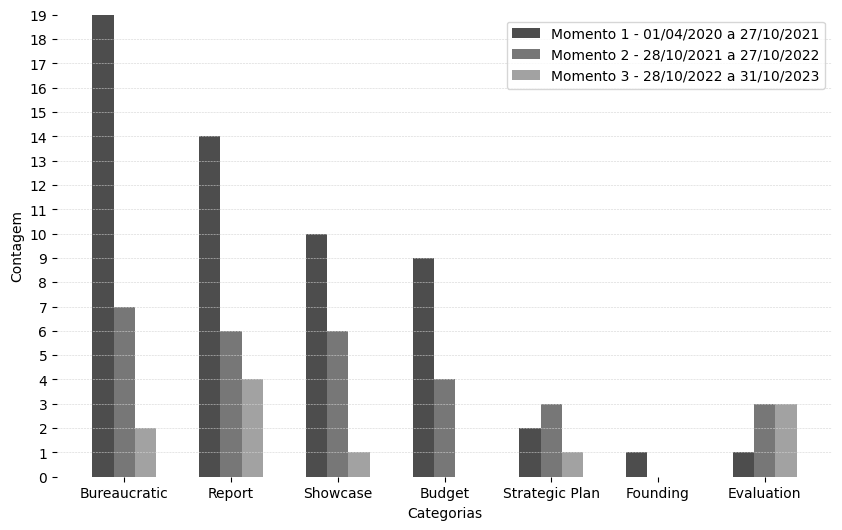

In [180]:
momentos = ['momento 1', 'momento 2', 'momento 3']

bar_width = 0.2
index = np.arange(len(df_resultado['categorias']))

plt.figure(figsize=(10, 6))

for i, momento in enumerate(momentos):
    gray_level = 0.3 + (i / len(momentos)) * 0.5  # Ajuste para tons de cinza mais escuros
    plt.bar(index + i * bar_width, df_resultado[momento], bar_width, label=momento, color=(gray_level, gray_level, gray_level))

plt.title('')
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.xticks(index + bar_width, df_resultado['categorias'])

# Configurando o eixo y para variar de 0 a 19
plt.yticks(np.arange(20))
plt.ylim(0, 19)

# Customizando a legenda dentro do quadro do gráfico
legend_labels = [
    'Momento 1 - 01/04/2020 a 27/10/2021',
    'Momento 2 - 28/10/2021 a 27/10/2022',
    'Momento 3 - 28/10/2022 a 31/10/2023'
]
plt.legend(legend_labels, loc='upper right')

# Adicionando linhas pontilhadas horizontais em cinza claro
for y in range(1, 19):
    plt.axhline(y, linestyle='dashed', color='lightgray', linewidth=0.4)

# Remover bordas da caixa ao redor do gráfico
plt.box(False)

plt.show()